In [38]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ecommerce_customers.csv")
# Data Cleaning
# Check for missing values
print(df.isna().sum())
# Check for duplicates
print(df.duplicated())
# Convert visit date to datetime format
df["VisitDate"] = pd.to_datetime(df["VisitDate"])
# Ensure correct data types for TimeOnPage and MadePurchase
print(df.dtypes)

CustomerID       0
VisitDate        0
ProductViewed    0
TimeOnPage       0
DeviceType       0
isNewCustomer    0
MadePurchase     0
dtype: int64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool
CustomerID                int64
VisitDate        datetime64[ns]
ProductViewed            object
TimeOnPage                int64
DeviceType               object
isNewCustomer            object
MadePurchase              int64
dtype: object


In [39]:
# Create New Columns
# Day of the month (Day)
df["Day"] = df["VisitDate"].dt.day_name()
# Day type (weekday vs weekend)
def chektd(day):
    if day == "Sunday" or day == "Saturday":
        return "Weekend"
    else:
        return "Weekday"
df["DayType"] = df["Day"].apply(chektd)
display(df)
#  Page time classification
def chekts(time):
    if time < 90:
        return "Short"
    elif time >= 90 and time < 150:
        return "Medium"
    else :
        return "Long"
df["Time of rest"] = df["TimeOnPage"].apply(chekts)


,CustomerID,VisitDate,ProductViewed,TimeOnPage,DeviceType,isNewCustomer,MadePurchase,Day,DayType
0,101,2023-02-01,Shoes,120,Mobile,Yes,1,Wednesday,Weekday
1,102,2023-02-01,Watch,90,Desktop,No,0,Wednesday,Weekday
2,103,2023-02-01,Bag,60,Desktop,Yes,1,Wednesday,Weekday
3,104,2023-02-02,T-Shirt,180,Mobile,No,0,Thursday,Weekday
4,105,2023-02-02,Shoes,210,Mobile,No,1,Thursday,Weekday
5,106,2023-02-02,Watch,45,Tablet,Yes,0,Thursday,Weekday
6,107,2023-02-03,Shoes,200,Desktop,Yes,1,Friday,Weekday
7,108,2023-02-03,T-Shirt,130,Mobile,No,0,Friday,Weekday
8,109,2023-02-03,Bag,50,Mobile,Yes,0,Friday,Weekday
9,110,2023-02-04,Watch,190,Desktop,No,1,Saturday,Weekend


In [40]:
# Key Analyses
# Conversion rate
print(f"the conversion rate is {df["MadePurchase"].sum() / len(df["CustomerID"])}")
#  New vs Returning customers ratio
x = df[df["isNewCustomer"]== "Yes"]
print(f" new customers ratio : {len(x["isNewCustomer"]) / len(df["CustomerID"]) * 100} %")
y = df[df["isNewCustomer"]== "No"]
print(f" returning customers ratio : {len(y["isNewCustomer"]) / len(df["CustomerID"]) * 100} %")
# Most visited product
pv = df["ProductViewed"].value_counts()
print(f" the most visited product is : {pv.idxmax()}")
# Average time spent by device type (DeviceType)
atsbd = df.groupby("DeviceType")["TimeOnPage"].mean()
display(atsbd)
# Top purchasing weekdays
tpw = df.groupby("Day")["MadePurchase"].sum()
display(tpw)
print("the top purchasing weekdays is (Wednesday, Saturday and Sunday)")

the conversion rate is 0.5333333333333333
 new customers ratio : 46.666666666666664 %
 returning customers ratio : 53.333333333333336 %
 the most visited product is : Shoes


DeviceType
Desktop    125.0
Mobile     142.5
Tablet      72.5
Name: TimeOnPage, dtype: float64

Day
Friday       1
Saturday     2
Sunday       2
Thursday     1
Wednesday    2
Name: MadePurchase, dtype: int64

the top purchasing weekdays is (Wednesday, Saturday and Sunday)


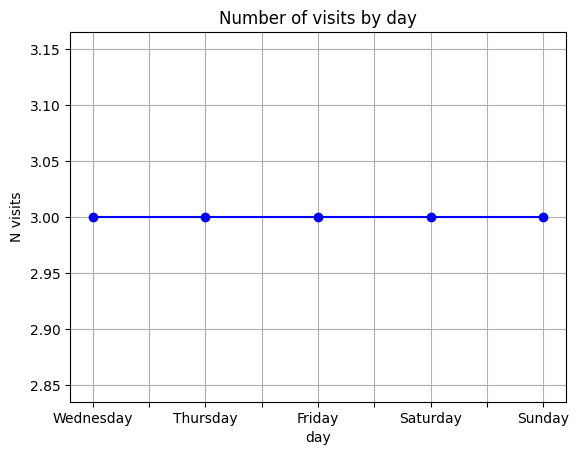

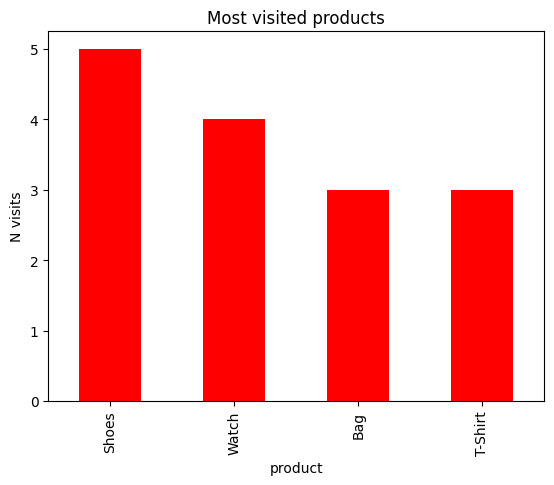

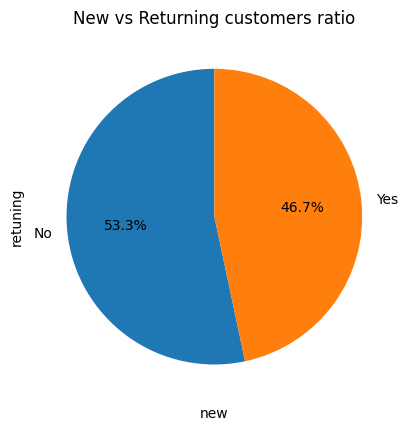

In [ ]:
# Visualizations
# Line Plot → Number of visits by day
novbd = df["Day"].value_counts()
novbd.plot(kind="line", color="blue", marker="o", title="Number of visits by day")
plt.xlabel("day")
plt.ylabel("N visits")
plt.grid(True)
plt.show()
# Bar Plot → Most visited products
mvp = df["ProductViewed"].value_counts()
mvp.plot(kind="bar", color="Red", title="Most visited products")
plt.xlabel("product")
plt.ylabel("N visits")
plt.show()
#  Pie Chart → New vs Returning customers ratio
nvrcr = df["isNewCustomer"].value_counts()
nvrcr.plot(kind="pie", autopct="%1.1f%%", startangle=90, title="New vs Returning customers ratio")
plt.show()